# TIME SERIES Without imputing the missing days in the dataset.

# Start(1.In this notebook,till now--Analysis of 'Oil Investment')

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df=df[['Date','Comp Stock']]

In [5]:
df.head(35)

,Date,Comp Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565
2,05-01-2010,0.001729
3,06-01-2010,-0.015906
4,07-01-2010,-0.001849
5,08-01-2010,0.006648
6,11-01-2010,-0.008822
7,12-01-2010,-0.011375
8,13-01-2010,0.014106
9,14-01-2010,-0.005792


In [7]:
df.tail()

,Date,Comp Stock
1979,09-11-2017,-0.002043
1980,10-11-2017,-0.006880
1981,13-11-2017,-0.004008
1982,14-11-2017,-0.015118
1983,15-11-2017,-0.013190


In [8]:
#df.sort_index()

# Converting to datetime format

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.head()

,Date,Comp Stock
0,2009-12-31,0.017354
1,2010-04-01,0.015565
2,2010-05-01,0.001729
3,2010-06-01,-0.015906
4,2010-07-01,-0.001849


In [11]:
df.tail()

,Date,Comp Stock
1979,2017-09-11,-0.002043
1980,2017-10-11,-0.006880
1981,2017-11-13,-0.004008
1982,2017-11-14,-0.015118
1983,2017-11-15,-0.013190


# Setting the 'Date' feature as index

In [12]:
df_compstock=df

In [13]:
df_compstock.set_index('Date',inplace=True)

In [14]:
df_compstock.head()

,Comp Stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849


In [15]:
df_compstock.head()

,Comp Stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849


# Analysis Start(A,B,C)

# A)Checking for white noise

In [16]:
df_compstock.index.nunique() 

1984

# All unique values ,  i.e  No white noise in data(No duplicate index).
# We can proceed with time series analysis.

In [17]:
df_compstock.shape

(1984, 1)

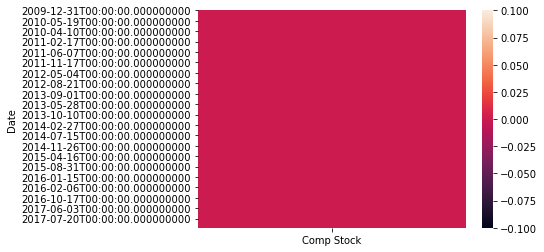

In [19]:
import seaborn as sns
sns.heatmap(df_compstock.isnull())

# CREATING TRAIN,VALIDATION AND TESTING DATASET

In [20]:
df_compstock_train=df_compstock['2009-12-31':'2013-12-31']#2009(just 1 data),2010,2011,2012,2013 end  = 5years span

In [21]:
df_compstock_train.tail()

,Comp Stock
Date,
2013-12-24,-0.004245
2013-12-26,-0.006641
2013-12-27,-0.006757
2013-12-30,-0.009945
2013-12-31,0.011722


In [22]:
df_compstock_val=df_compstock['2014-1-1':'2016-12-31']# 2years

In [23]:
df_compstock_val.tail()

,Comp Stock
Date,
2016-12-23,0.001978
2016-12-27,0.006351
2016-12-28,-0.004264
2016-12-29,-0.000257
2016-12-30,-0.007796


In [25]:
df_compstock_test=df_compstock['2016-12-31':'2017-11-15'] # 1year

In [26]:
df_compstock_test.tail()

,Comp Stock
Date,
2017-09-11,-0.002043
2017-10-11,-0.006880
2017-11-13,-0.004008
2017-11-14,-0.015118
2017-11-15,-0.013190


## Step 2: Visualize the Data

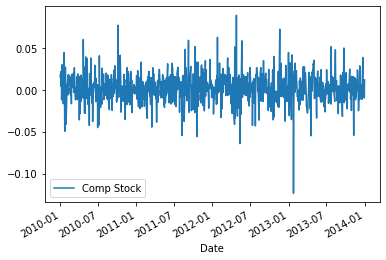

In [27]:
df_compstock_train.plot()

# B)Selecting the model after visualization above

###### In above plot data looks non-seasonal /  irregular .

   Usually in seasonal data we use SARIMAX.
           in irregular(non-seasonal) we use ARIMAX.
           
   Here we will implement ARIMAX as our data looks non-seasonal /  irregular.
   Before that,Now

###### we will check if data is STATIONARY or not.

# df_oil--> we will implement ARIMAX as our data looks non-seasonal / irregular

# C)Testing For Stationarity

In [28]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [29]:
test_result=adfuller(df_compstock_train['Comp Stock']) # adfuller give us 5 values

In [30]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-8.657219403035587, 4.93162317835981e-14, 12, 994, {'1%': -3.43694584277544, '5%': -2.8644520725172873, '10%': -2.5683205291305176}, -5189.359509795361)


### Most important value is p-value above(2nd value(0.0))

# Ho(null hypothesis): time series is non-stationary          
# H1(altenative): time series is stationary

# Step-1.Rolling/Addfuller

In [31]:
#Ho: It is non stationary
#H1: It is stationary
#considered 0.05 in general.

def adfuller_test(sales):
    result=adfuller(sales) 
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [32]:
adfuller_test(df_compstock_train['Comp Stock']) #call the function

ADF Test Statistic : -8.657219403035587
p-value : 4.93162317835981e-14
#Lags Used : 12
Number of Observations Used : 994
strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary


## Auto Regressive Model(AR)--Just for visualization
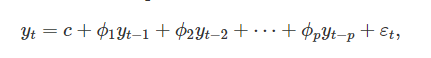

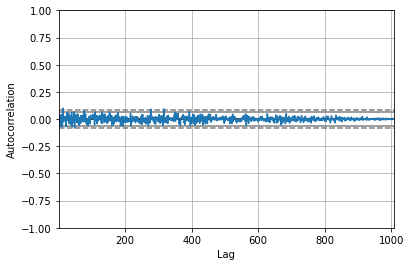

In [33]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_compstock_train['Comp Stock']) 
plt.show()

# Plotting ACF(Autocorrelation) & PACF(Partial Autocorrelation)

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

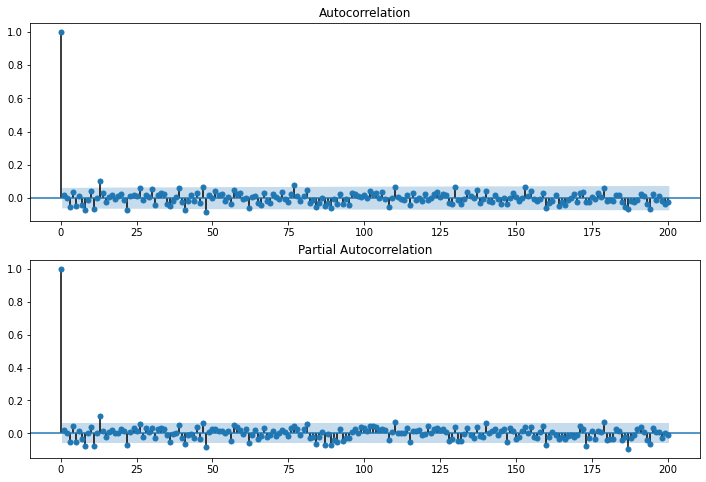

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df_compstock_train['Comp Stock'],lags=200,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_compstock_train['Comp Stock'],lags=200,ax=ax2)

# D)Model Building-->Arima model Implementation

In [36]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA

# Training the model(df_oil)

# Converting date/time index to period[D] as our data is in days.

In [37]:
df_compstock_train.index = pd.DatetimeIndex(df_compstock_train.index).to_period('D')
                         #changing the dataframe index to period in days
    #this is done to silence the warning of feeding a datetime format in the index

In [39]:
model=ARIMA(df_compstock_train['Comp Stock'],order=(1,1,1)) # this order is p d q(0 or 1) 
results=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [40]:
#This above Warning is making the model forecast all the values as constant.

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                 1006
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2635.741
Method:                       css-mle   S.D. of innovations              0.018
Date:                Wed, 04 Nov 2020   AIC                          -5263.483
Time:                        18:20:55   BIC                          -5243.828
Sample:                             1   HQIC                         -5256.015
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.973e-07   1.29e-05      0.031      0.975   -2.49e-05    2.57e-05
ar.L1.D.Comp Stock     0.0271      0.033      0.830      0.407      -0.037       0.091
ma.L1.D.Comp Stock    -0.9784      0.017    -56.252      0.000      -1.013      -0.944
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           36.9405           +0.0000j           36.9405            0.0000
MA.1            1.0220           +0.0000j            1.0220            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
results.forecast(10) #interpretation??

(array([0.0021364 , 0.0018773 , 0.00187067, 0.00187088, 0.00187127,
        0.00187167, 0.00187206, 0.00187246, 0.00187286, 0.00187326]),
 array([0.01758865, 0.01760944, 0.01761403, 0.01761835, 0.01762267,
        0.01762698, 0.01763129, 0.01763559, 0.0176399 , 0.01764421]),
 array([[-0.03233673,  0.03660952],
        [-0.03263657,  0.03639116],
        [-0.0326522 ,  0.03639354],
        [-0.03266046,  0.03640222],
        [-0.03266852,  0.03641106],
        [-0.03267657,  0.0364199 ],
        [-0.03268462,  0.03642875],
        [-0.03269267,  0.03643759],
        [-0.03270071,  0.03644643],
        [-0.03270875,  0.03645526]]))

# Testing accuracy on training set

In [43]:
df_compstock_train['2012-01-02':'2013-12-31']

,Comp Stock
Date,
2012-01-02,-0.000635
2012-02-02,-0.002345
2012-03-02,0.010019
2012-06-02,0.009333
2012-07-02,0.010475
...,...
2013-12-24,-0.004245
2013-12-26,-0.006641
2013-12-27,-0.006757


<ipython-input-44-33e732c7245f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compstock_train['forecast']=results.predict(start='2012-01-02',end='2013-12-31',dynamic=True)


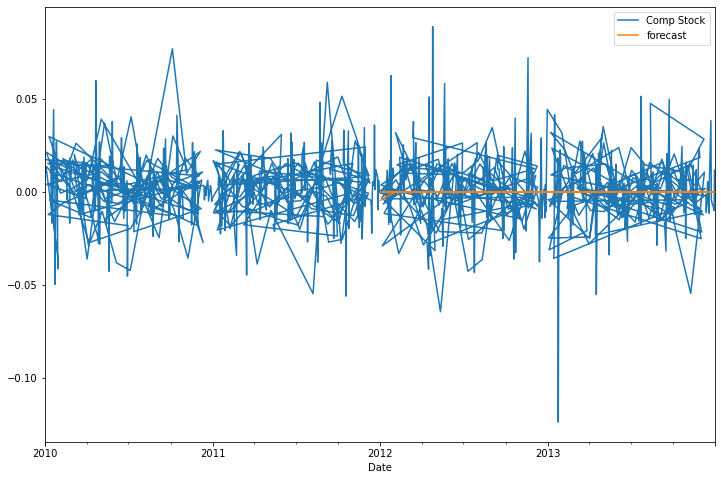

In [44]:
df_compstock_train['forecast']=results.predict(start='2012-01-02',end='2013-12-31',dynamic=True)
df_compstock_train[['Comp Stock','forecast']].plot(figsize=(12,8))

In [40]:
### In Above fig.The orange line is not overlapping on the blue line path,i.e model accuracy is not good.


In [41]:
#Model is predicting all values are constant
#this is because of the warning while fitting the data.
#ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

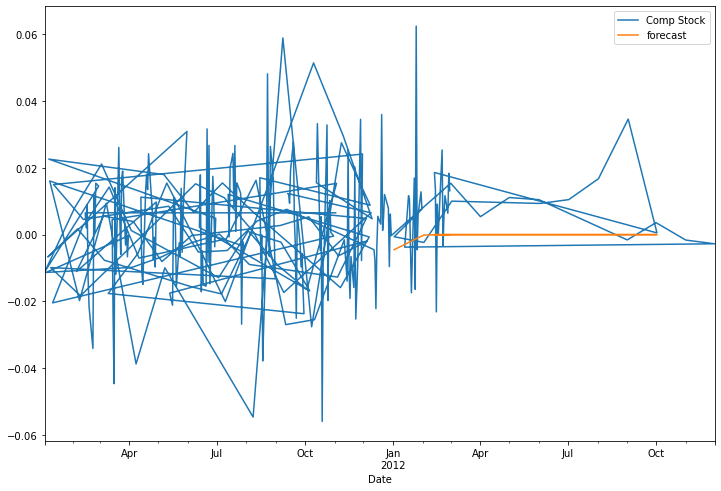

In [45]:
df_compstock_train[['Comp Stock','forecast']]['2011-11-02':'2012-02-29'].plot(figsize=(12,8))


In [47]:
df_compstock_train['2012-01-02':'2013-12-31']

,Comp Stock,forecast
Date,,
2012-01-02,-0.000635,-4.511412e-03
2012-02-02,-0.002345,-1.217398e-04
2012-03-02,0.010019,-2.909007e-06
2012-06-02,0.009333,3.078071e-07
2012-07-02,0.010475,3.948880e-07
...,...,...
2013-12-24,-0.004245,3.973110e-07
2013-12-26,-0.006641,3.973110e-07
2013-12-27,-0.006757,3.973110e-07


In [44]:
#We can see except a few point all other points are same,constant(3.973110e-07)
#upward movement of graph from loss position to 0 i.e no profit no gain situation seen in the data is due to the points in satrt(2012-01-02	-0.008430	3.436467e-03  |  2012-02-02	-0.013008	-8.838780e-06)